In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df= pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory= False)

In [10]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65535 non-null  int64  
 1   NAME                            65332 non-null  object 
 2   host id                         65535 non-null  int64  
 3   host_identity_verified          65318 non-null  object 
 4   host name                       65258 non-null  object 
 5   neighbourhood group             65506 non-null  object 
 6   neighbourhood                   65519 non-null  object 
 7   lat                             65527 non-null  float64
 8   long                            65527 non-null  float64
 9   country                         65212 non-null  object 
 10  country code                    65449 non-null  object 
 11  instant_bookable                65449 non-null  object 
 12  cancellation_policy             

In [12]:
df.duplicated().value_counts()

,count
False,65535


In [13]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


CLEAN DATA

In [14]:
df.drop_duplicates(inplace = True)
df.drop(['house_rules', 'license'], axis=1, inplace = True)


In [15]:
df['price']= df['price'].str.replace('$', '', regex= False)
df['service fee']=df['service fee'].str.replace('$', '', regex= False)
df['price']= df['price'].str.replace(',', '', regex= False)
df['service fee']=df['service fee'].str.replace(',', '', regex= False)
df.rename(columns= {
    'price':'price_$',
    'service fee': 'service_fee_$'
}
    , inplace = True)

In [16]:
df.dropna(inplace = True)
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']= pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)


/tmp/ipython-input-254507183.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review']= pd.to_datetime(df['last review'])


In [17]:
df.loc[df['neighbourhood group']== 'brookln','neighbourhood group']= 'Brooklyn'

In [18]:
df= df.drop(df[df['availability 365'] > 500].index)

In [19]:
df.duplicated().value_counts()

,count
False,52889


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52889 entries, 0 to 65534
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              52889 non-null  object        
 1   NAME                            52889 non-null  object        
 2   host id                         52889 non-null  object        
 3   host_identity_verified          52889 non-null  object        
 4   host name                       52889 non-null  object        
 5   neighbourhood group             52889 non-null  object        
 6   neighbourhood                   52889 non-null  object        
 7   lat                             52889 non-null  float64       
 8   long                            52889 non-null  float64       
 9   country                         52889 non-null  object        
 10  country code                    52889 non-null  object        
 11  instant

EDA

In [21]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,52889.000000,52889.000000,52889.000000,52889.000000,52889.000000,52889.000000,52889.000000,52889,52889.000000,52889.000000,52889.000000,52889.000000
mean,40.727358,-73.947995,2012.503091,625.033088,125.007034,7.346329,32.756017,2019-09-13 21:28:07.723344896,1.437847,3.314621,7.788066,156.681673
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687470,-73.982410,2008.000000,338.000000,68.000000,1.000000,3.000000,2019-01-01 00:00:00,0.250000,2.000000,1.000000,26.000000
50%,40.721540,-73.953730,2012.000000,624.000000,125.000000,3.000000,11.000000,2019-06-21 00:00:00,0.830000,3.000000,1.000000,134.000000
75%,40.762670,-73.930070,2017.000000,913.000000,183.000000,5.000000,37.000000,2021-10-10 00:00:00,2.080000,4.000000,3.000000,282.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056420,0.051238,5.757122,332.072221,66.417561,32.416823,54.799122,NaN,1.825267,1.263070,30.915902,132.949631


different types of properties in dataset

In [22]:
property_types= df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,28778
Private room,23007
Shared room,1013
Hotel room,91


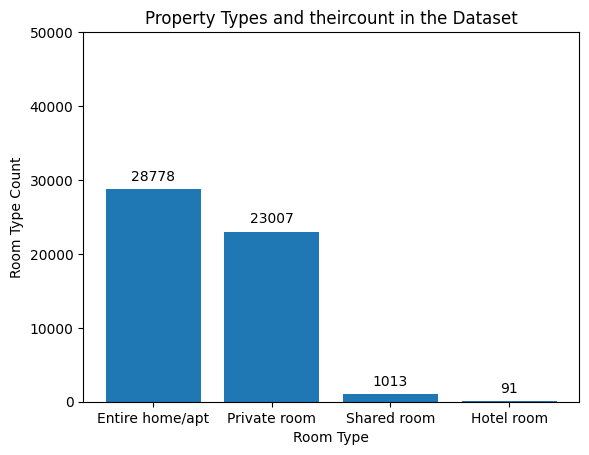

In [23]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels= property_types.loc[:,"count"], padding= 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and theircount in the Dataset');

which neighbourhood group has the highest number of listings

In [24]:
hood_group= df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,21942
Brooklyn,21672
Queens,7251
Bronx,1508
Staten Island,516


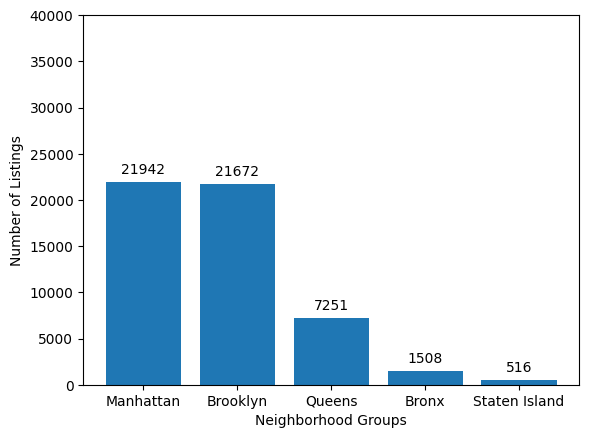

In [25]:
hood_group_bar = plt.bar(hood_group.index,hood_group.loc[:, 'count']);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');

which neighborhoods group have the highest average prices for airbnb listings

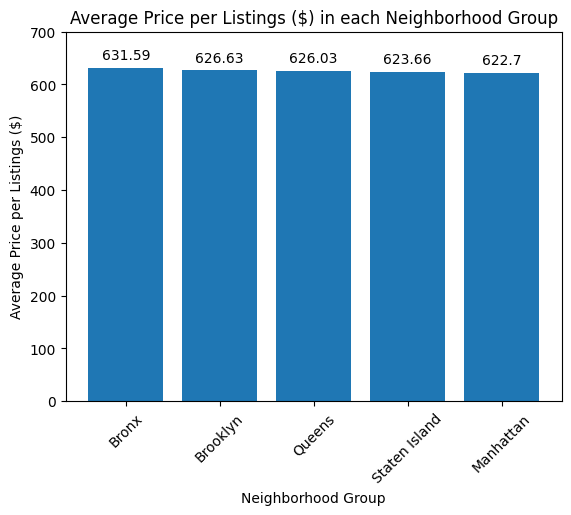

In [26]:
avg_price= df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending= False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0, 700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

is there a relationship between the construction year of property and price

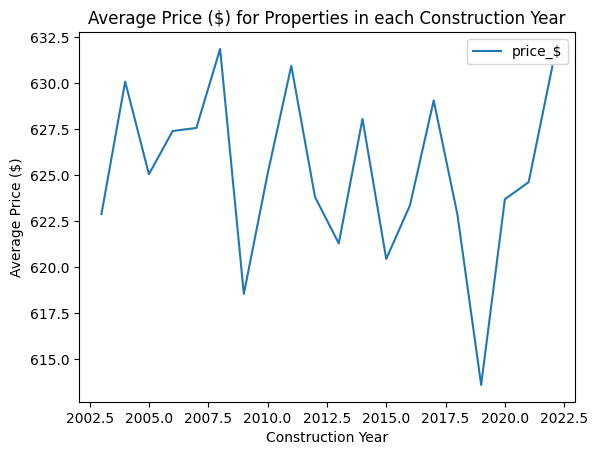

In [27]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');


who are the top 10 hosts by calculated host listing count

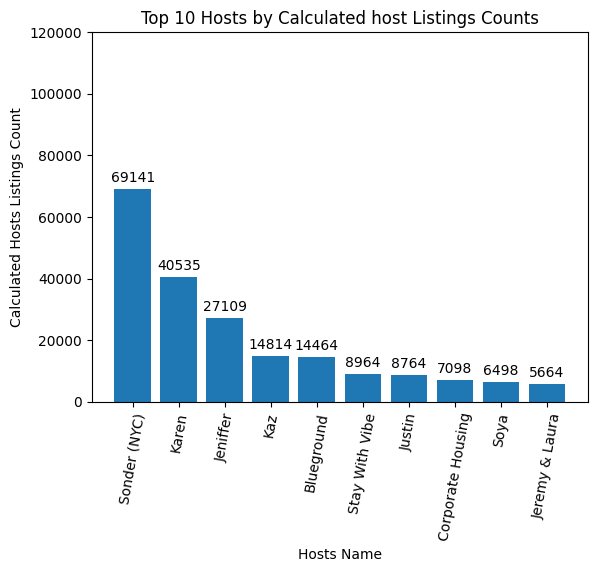

In [28]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar= plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge' , padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Hosts Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Counts') ;



are hosts with verified identities more likely to receive positive reviews


In [29]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.314724
unconfirmed,3.314518


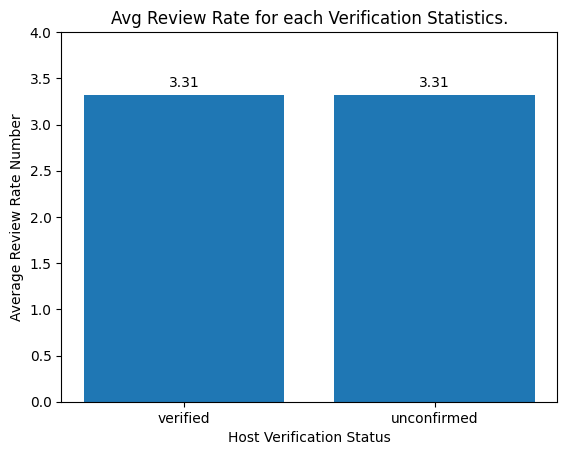

In [30]:
review_bar= plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Avg Review Rate for each Verification Statistics.');

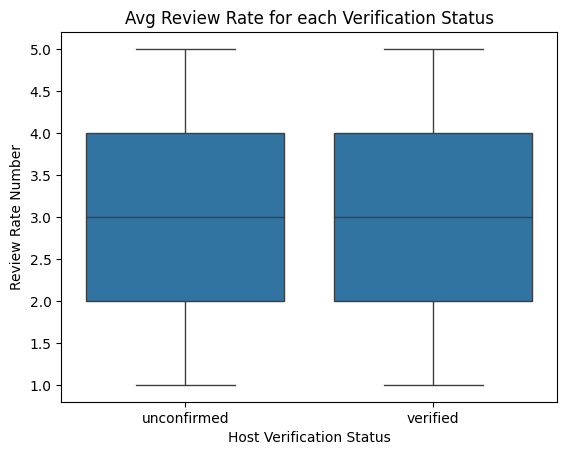

In [31]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x= "host_identity_verified", y= "review rate number", color = base_color)
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Avg Review Rate for each Verification Status');

is there a correlation between the price of a listing and its service fee

In [32]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909407734455)

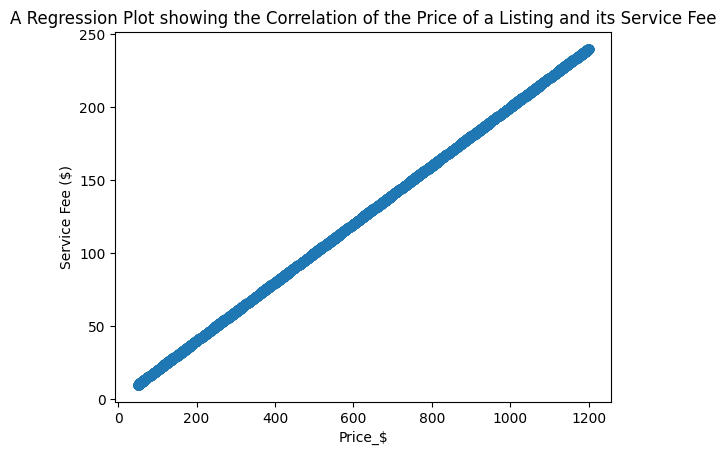

In [33]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price_$');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee');

what is the avg review rate number for listings and does it vary based on the neighbouhood group and room type


In [34]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.413570
                    Private room               3.376655
                    Shared room                3.344828
Brooklyn            Entire home/apt            3.282895
                    Hotel room                 3.600000
                    Private room               3.309447
                    Shared room                3.362069
Manhattan           Entire home/apt            3.302416
                    Hotel room                 3.518987
                    Private room               3.315698
                    Shared room                3.303828
Queens              Entire home/apt            3.368787
                    Hotel room                 3.571429
                    Private room               3.361702
                    Shared room                3.326087
Staten Island       Entire home/apt            3.358696
                    Private room               3.544681
                    Shared room                3.600000

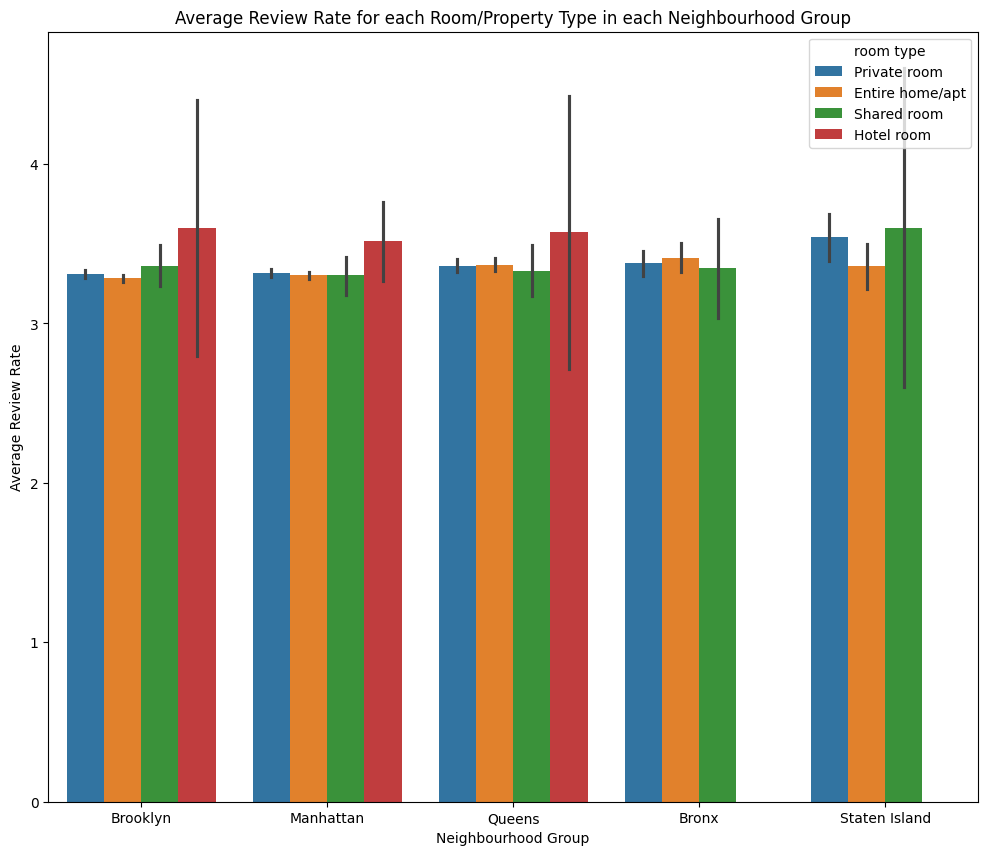

In [35]:
plt.figure(figsize = [12, 10]);
sns.barplot(data= df, x = 'neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group');

are hosts with a higher calculated host listongs count more likely to maintain higher availability throughout tthr year

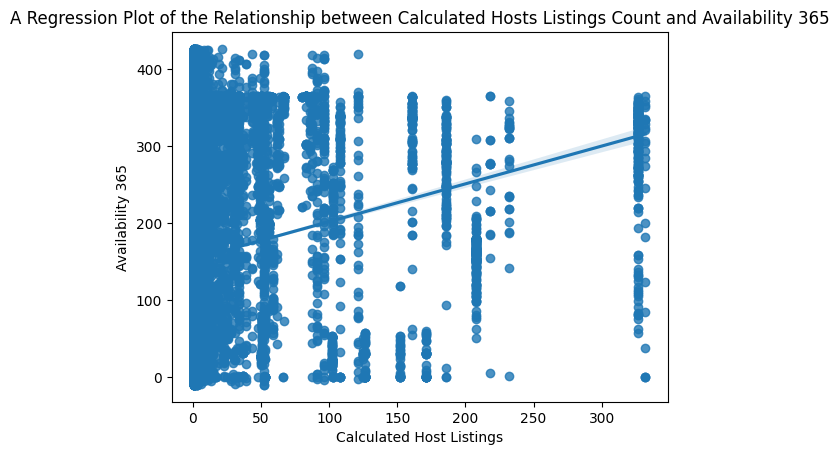

In [36]:
sns.regplot(df, x = 'calculated host listings count', y= 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Hosts Listings Count and Availability 365');

In [37]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.11399378925918764)